In [ ]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

import pandas as pd
import pygmt

from pygmt.datasets import load_earth_relief
pygmt.config(FONT="12p", IO_SEGMENT_MARKER="<<<")
pygmt.config(MAP_FRAME_TYPE = 'plain')

#Import necessary files#

In [26]:
quarries_james_1 = pd.read_csv(
    '/home/bmelo/Quarry/Quarry-Blast/James_files/IRELAND.quarry.coords.txt',
    sep = r'\s+',
    header=None,
    names=['name','co','lat','lon'])
quarry_blasts_1 = pd.read_csv(
    "/home/bmelo/Quarry/Quarry-Blast/James_files/quarry-blast-catalog-2013-2014.csv",
    sep=r'\s+',
    header=None,
    names=['ID','date','time','lat','lat-err','lon','lon-err','depth','rms','az','n','magnitude'])
earthquakes = pd.read_csv(
    '/mnt/REPO/QUARRY-BLASTS/CATALOGS/earthquake-catalog-2012-2024.csv',
    sep=r'\s+',
    names=['EVENT-ID', 'DATE', 'TIME', 'LAT(deg)', 'LAT-ERR(km)', 'LON(deg)', 'LON-ERR(km)', 'DEPTH(km)', 'RMS(s)', 'AZ-GAP(deg)', 'N_PHASES', 'MAG(ML)'])
stations_1 = pd.read_csv(
    "/home/bmelo/Quarry/Quarry-Blast/James_files/Total_Stations_List.txt", 
    delimiter=' ',
    header = 0,
    names=['sta', 'name','lat', 'lon', 'elevation', 'net', 'end'])

blasts_2 = pd.read_csv('/home/bmelo/bin/SeisBlast/files/Eire_blasts_relocated.csv')
########new stuff for comparison
# Load station data to lon lat file and dataframe
stations_2 = pd.read_csv(
    "/home/bmelo/Quarry/Quarry-Blast/new_files/Total_Stations_List.txt", 
    delimiter=' ',
    names=['sta', 'name','lat', 'lon', 'elevation', 'net', 'end'])

quarries_james_2 = pd.read_csv(
    '/mnt/REPO/QUARRY-BLASTS/ADMIN/IRELAND.quarry.coords.txt',
    sep = r'\s+',
    header=None,
    names=['name','co','lat','lon'])

blasts_catalogue_2 = pd.read_csv(
    '/mnt/REPO/QUARRY-BLASTS/CATALOGS/quarry-blast-catalog-2022-2024.csv',
    sep=r'\s+',
    header=None,
    names=['ID','date','time','lat','lat-err','lon','lon-err','depth','rms','az','n','magnitude'])

blasts_2 = pd.read_csv('/home/bmelo/bin/SeisBlast/new_files/Eire_blasts_relocated.csv')

In [7]:
region = [-11, -5, 51, 56]
#projection = "M10c"

topo = load_earth_relief(
    resolution="30s",
    region=region,
    registration="gridline",
)

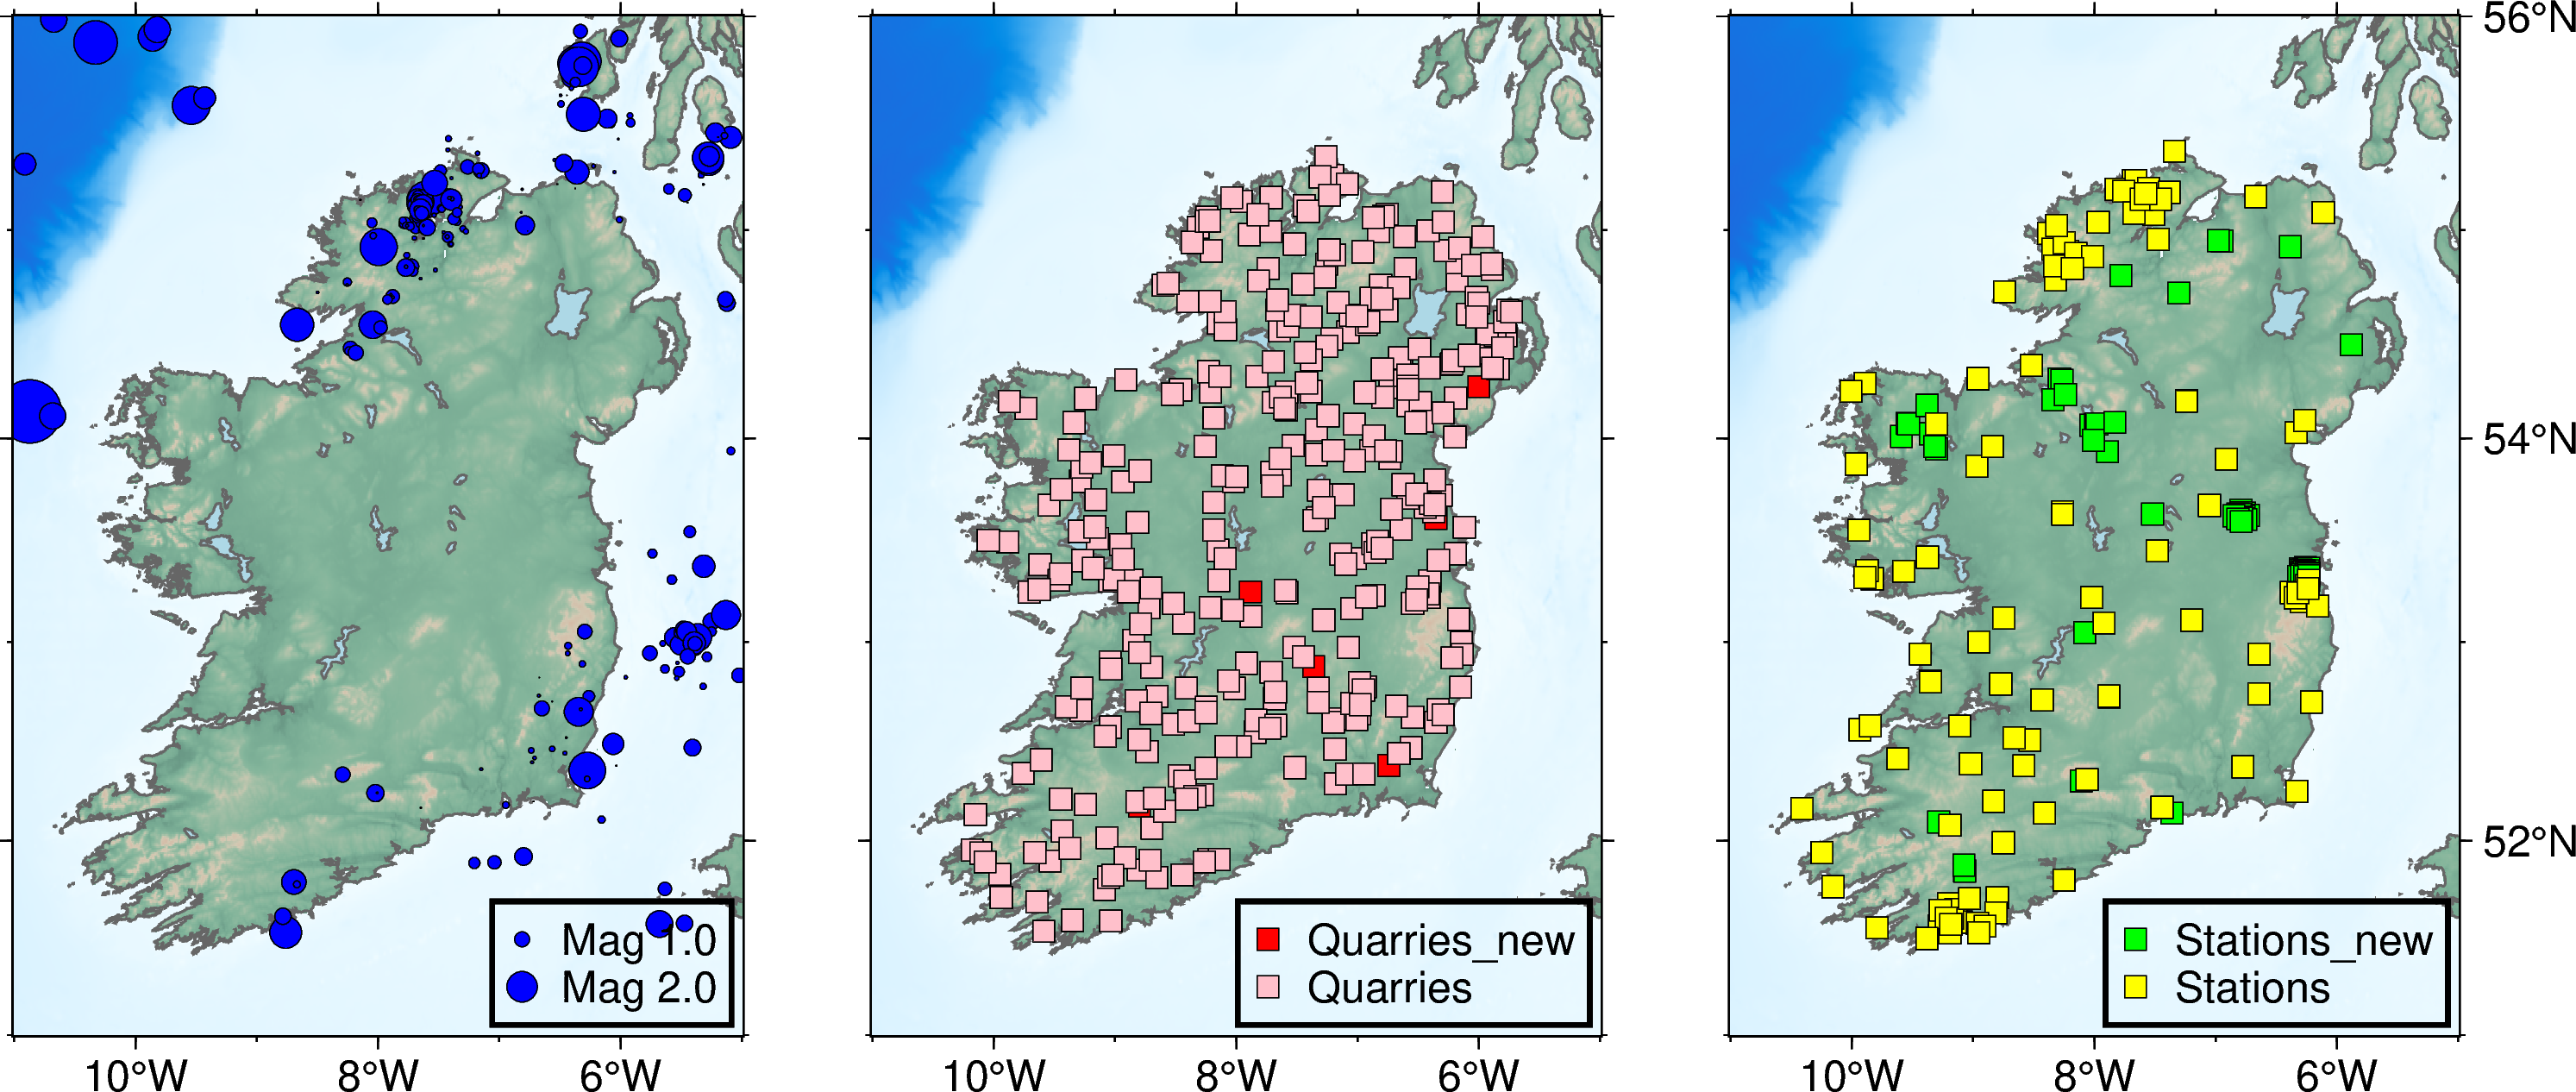

In [27]:
fig = pygmt.Figure()

with fig.subplot(
    nrows=1,
    ncols=3,
    figsize=("24c", "10c"),
    frame="wesn",
    margins="0.5/1c",
    sharex="b",
    sharey="r"
    ):
    
    pygmt.makecpt(cmap="terra", series=[-5000, 3000])
    with fig.set_panel(panel=0):
        fig.basemap(region=region, projection="M?")
        fig.grdimage(grid=topo)
        fig.coast(shorelines="0.6p,gray40", resolution="f", lakes="lightblue")
        fig.plot(
            x=pd.to_numeric(earthquakes['LON(deg)'], errors='coerce'),
            y=pd.to_numeric(earthquakes['LAT(deg)'], errors='coerce'),
            style="c",
            size=pd.to_numeric(earthquakes['MAG(ML)'], errors='coerce') * 0.15,
            fill="blue",
            pen="black"
        )
        
        legend_sizes = [0.15, 0.3]
        legend_labels = ["Mag 1.0", "Mag 2.0"]
        legend_lons = [6] * 2
        legend_lats = [51.5, 52]
        
        for lon, lat, size, label in zip(legend_lons, legend_lats, legend_sizes, legend_labels):
            fig.plot(
                x=[lon], y=[lat],
                style="c"+str(size)+"c",
                fill="blue", pen="black",
                label=label  # Registers item for legend
            )
        fig.legend(position="jBR+o0.1c", box=True)
        
    with fig.set_panel(panel=1):
        fig.basemap(region=region, projection="M?")
        fig.grdimage(grid=topo)
        fig.coast(shorelines="0.6p,gray40", resolution="h", lakes="lightblue")
        fig.plot(x=quarries_james_2['lon'], y=quarries_james_2['lat'], style="s0.3c", fill="red", pen="black", label="Quarries_new")
        fig.plot(x=quarries_james_1['lon'], y=quarries_james_1['lat'], style="s0.3c", fill="pink", pen="black", label="Quarries")
        fig.legend(position="jBR+o0.1c", box=True)
        
    with fig.set_panel(panel=2):
        fig.basemap(region=region, projection="M?")
        fig.grdimage(grid=topo)
        fig.coast(shorelines="0.6p,gray40", resolution="h", lakes="lightblue")
        fig.plot(x=stations_2['lon'], y=stations_2['lat'], style="s0.3c", fill="green", pen="black", label="Stations_new")
        fig.plot(x=stations_1['lon'], y=stations_1['lat'], style="s0.3c", fill="yellow", pen="black", label="Stations")
        fig.legend(position="jBR+o0.1c", box=True)
        
# Add legend
#
fig.show(width=800)
#fig.savefig("/home/bmelo/bin/Quarry/new_files/earthquake-quarry.png", dpi=300)

pygmt-session [WARNING]: Unable to parse 1 longitude strings
pygmt-session [WARNING]: Unable to parse 1 longitude strings


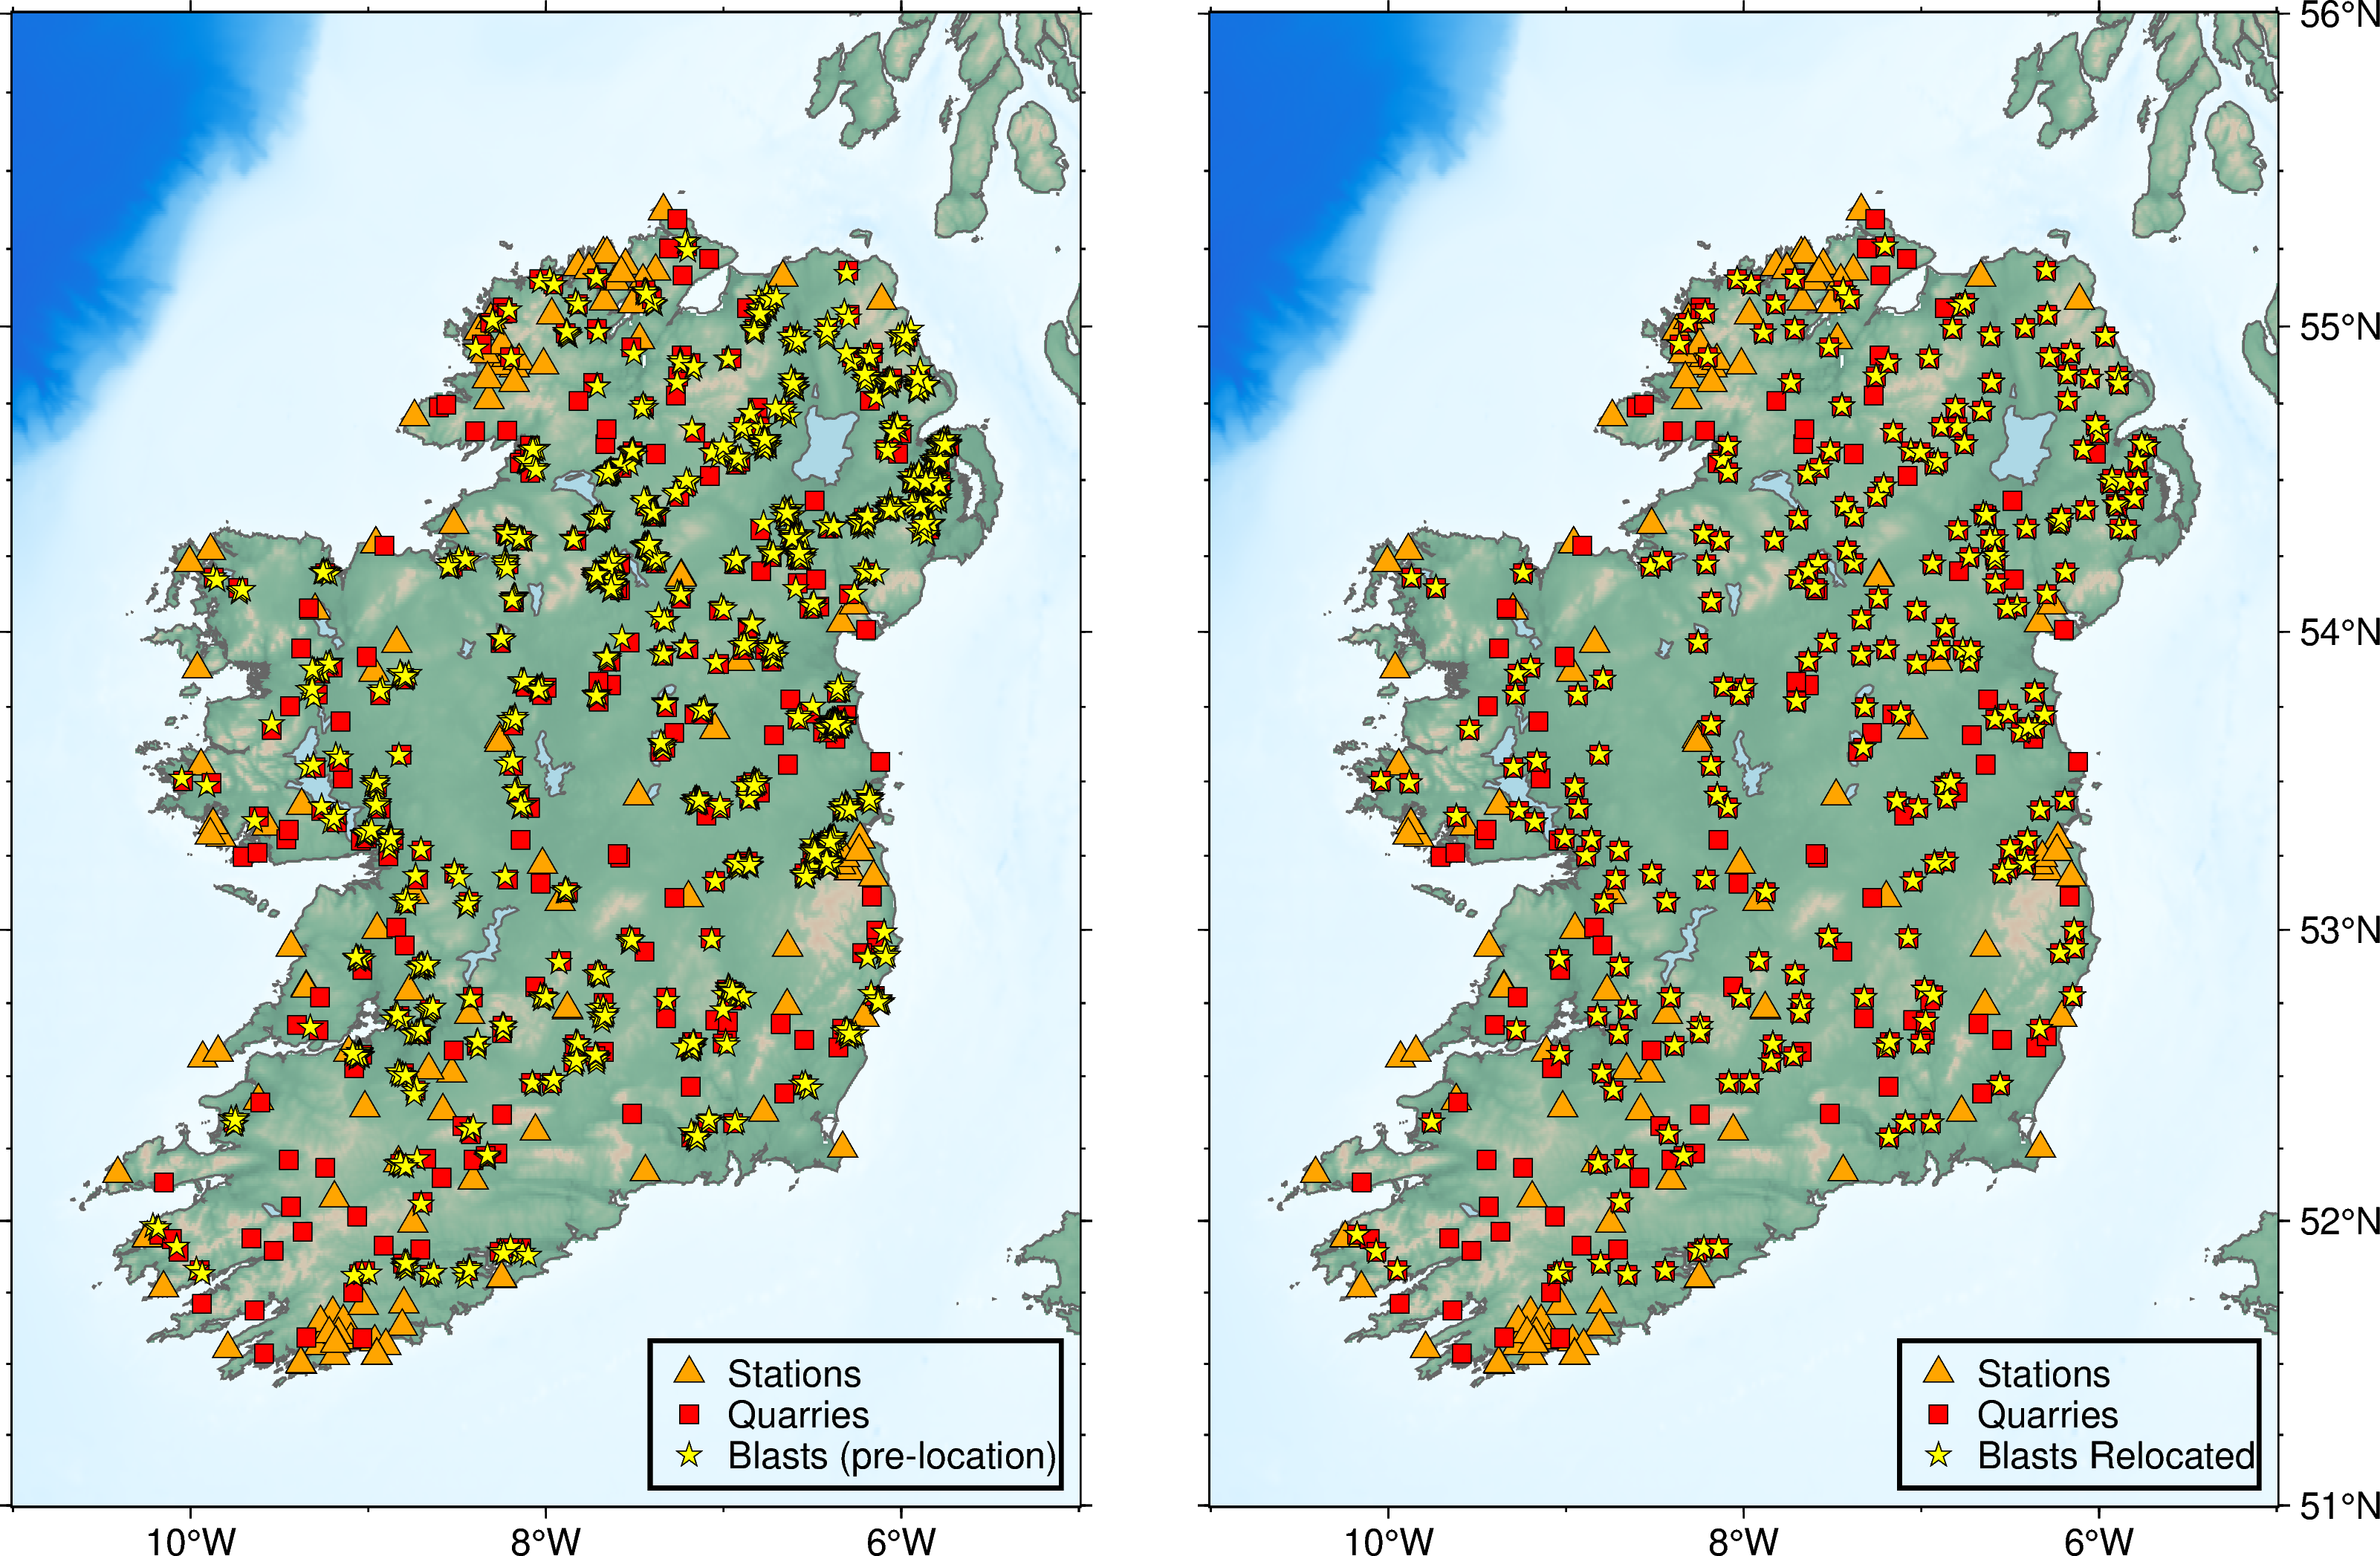

In [ ]:
#now with stations and ray paths?
#and relocation and start model? 
fig = pygmt.Figure()

with fig.subplot(
    nrows=1,
    ncols=2,
    figsize=("26c", "17c"),
    frame="wesn",
    margins="0.5/1c",
    sharex="b",
    sharey="r"
    #autolabel=True
    ):
    
    pygmt.makecpt(cmap="terra", series=[-5000, 3000])
    with fig.set_panel(panel=0):
        fig.basemap(region=region, projection="M?")
        fig.grdimage(grid=topo)
        fig.coast(shorelines="0.6p,gray40", resolution="h", lakes="lightblue")
        fig.plot(x=stations['lon'], y=stations['lat'], style="t0.4c", pen="black", fill="orange", label="Stations")
        fig.plot(x=quarries_james['lon'], y=quarries_james['lat'], style="s0.3c", fill="red", pen="black", label="Quarries")
        fig.plot(x=quarry_blasts['lon'], y=quarry_blasts['lat'], style="a0.3c", fill="yellow", pen="black", label="Blasts (pre-location)")
        fig.legend(position="jBR+o0.2c", box=True)
        
    with fig.set_panel(panel=1):
        fig.basemap(region=region, projection="M?")
        fig.grdimage(grid=topo)
        fig.coast(shorelines="0.6p,gray40", resolution="h", lakes="lightblue")
        fig.plot(x=stations['lon'], y=stations['lat'], style="t0.4c", pen="black", fill="orange", label="Stations")
        fig.plot(x=quarries_james['lon'], y=quarries_james['lat'], style="s0.3c", fill="red", pen="black", label="Quarries")
        fig.plot(x=blasts['lon-quarry'], y=blasts['lat-quarry'], style="a0.3c", fill="yellow", pen="black", label="Blasts Relocated")
        fig.legend(position="jBR+o0.2c", box=True)
        
    #add a subplot with the ray paths


# Add legend
fig.show(width=800)
fig.savefig("/home/bmelo/bin/Quarry/new_files/quarry_blasts_relocation.png", dpi=300)

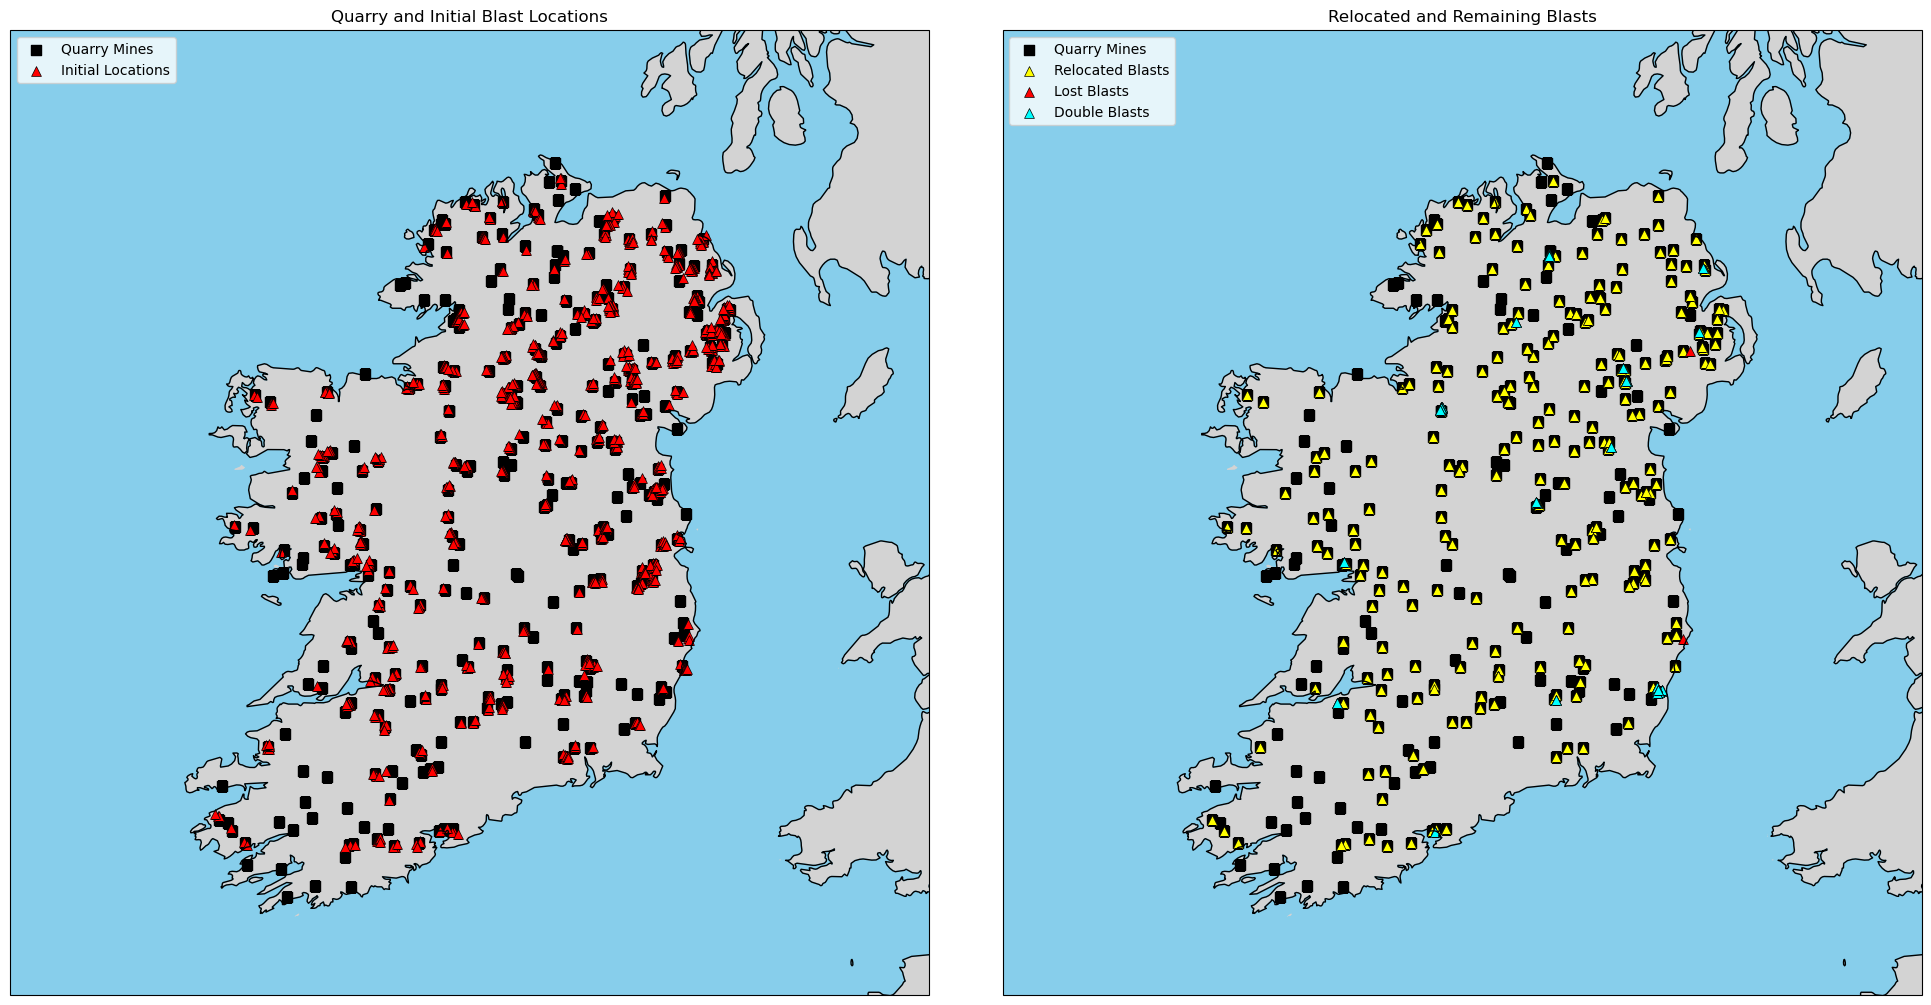

In [ ]:
# # Define the region as (min_lon, max_lon, min_lat, max_lat)
# region = [-12, -4, 51, 56]  # Replace with your actual region
# xa
# # Create a figure with two subplots
# fig, axes = plt.subplots(
#     nrows=1, ncols=2, 
#     figsize=(20, 10),
#     subplot_kw={"projection": ccrs.Mercator()})

# # Common settings for both subplots
# for ax in axes:
#     ax.set_extent(region, crs=ccrs.PlateCarree())  # Set map region
#     ax.add_feature(cfeature.LAND, color="lightgray")
#     ax.add_feature(cfeature.OCEAN, color="skyblue")
#     ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
#     # ---- First Panel ----
# ax1 = axes[0]
# ax1.set_title("Quarry and Initial Blast Locations")

# # ax1.scatter(quarries_new["lon"], quarries_new["lat"],
# #             color="blue", marker="s", s=50, alpha=0.5, label="Quarry Mines",
# #             transform=ccrs.PlateCarree())

# # Plot quarry mine locations (black squares)
# ax1.scatter(quarries_james["lon"], quarries_james["lat"],
#             color="black", marker="s", s=50, label="Quarry Mines",
#             transform=ccrs.PlateCarree())

# # Plot initial blast locations (green triangles)
# ax1.scatter(blasts["lon_ev"], blasts["lat_ev"],
#             color="red", marker="^", s=50,
#             edgecolors="black", linewidth=0.5,
#             label="Initial Locations",
#             transform=ccrs.PlateCarree())

# ax1.legend(loc="upper left")

# # ---- Second Panel ----
# ax2 = axes[1]
# ax2.set_title("Relocated and Remaining Blasts")

# # Plot quarry mine locations (black squares)
# ax2.scatter(quarries_james["lon"], quarries_james["lat"],
#             color="black", marker="s", s=50, label="Quarry Mines",
#             transform=ccrs.PlateCarree())

# # Plot relocated blasts (green triangles)
# ax2.scatter(blasts["lon-quarry"], blasts["lat-quarry"],
#             color="yellow", marker="^", s=50,
#             edgecolors="black", linewidth=0.5,
#             label="Relocated Blasts",
#             transform=ccrs.PlateCarree())

# # Plot relocated blasts (green triangles)
# ax2.scatter(lost_blasts["LON(deg)"], lost_blasts["LAT(deg)"],
#             color="red", marker="^", s=50,
#             edgecolors="black", linewidth=0.5,
#             label="Lost Blasts",
#             transform=ccrs.PlateCarree())

# ax2.scatter(double_blasts["lon_ev"], double_blasts["lat_ev"],
#             color="cyan", marker="^", s=50,
#             edgecolors="black", linewidth=0.5,
#             label="Double Blasts",
#             transform=ccrs.PlateCarree())

# ax2.legend(loc="upper left")

# # Show the final map
# plt.tight_layout()
# plt.show()